In [1]:
import sys
sys.path.append('.')

In [2]:
from os import access
import numpy as np
from numpy.random import default_rng
from model import Permutation
from matplotlib import pyplot as plt
from tqdm import tqdm
from decode import decode

In [3]:
# Read alphabet, letter probabilities, and transition probabilities
A = np.genfromtxt(
    '/Users/juanmoo/Desktop/6.437 Project/data/alphabet.csv', delimiter=',', dtype=str)
A_map = {c: j for j, c in enumerate(A)}

P = np.genfromtxt(
    '/Users/juanmoo/Desktop/6.437 Project/data/letter_probabilities.csv', delimiter=',')
P = np.log2(P)

M = np.genfromtxt(
    '/Users/juanmoo/Desktop/6.437 Project/data/letter_transition_matrix.csv', delimiter=',')
M = np.log2(M)

# Load plain text and cipher text
cipher_text_path = '/Users/juanmoo/Desktop/6.437 Project/data/sample/ciphertext.txt'
plain_text_path = '/Users/juanmoo/Desktop/6.437 Project/data/sample/plaintext.txt'

cipher_text = open(cipher_text_path, 'r').read()
plain_text = open(plain_text_path, 'r').read()

x = np.array([A_map[c] for c in plain_text])
y = np.array([A_map[c] for c in cipher_text])
p_val_store = []
accept_store = []
accuracy_store = []



<ipython-input-3-6bba40e3256b>:12: RuntimeWarning: divide by zero encountered in log2
  M = np.log2(M)


In [4]:
# Better initialization
cipher_freq = np.array([0] * len(A))
for c in y:
    cipher_freq[c] += 1
emperical_freq_order = sorted(np.arange(len(A)), key=lambda c: -cipher_freq[c])
english_freq_order = sorted(np.arange(len(A)), key=lambda c: -P[c])
initial_mapping = np.arange(len(A))
for real, ciph in zip(english_freq_order, emperical_freq_order):
    initial_mapping[real] = ciph

In [5]:
x_decode = decode(y, P, M, x=x, initial_mapping=initial_mapping, has_breakpoint=False,
                    max_sample_size=10000, max_iter_count=3500, p_val_store=p_val_store, accept_store=accept_store, accuracy_store=accuracy_store)
decoded_text = ''.join([A[j] for j in x_decode])


100%|██████████| 3500/3500 [00:48<00:00, 71.76it/s]


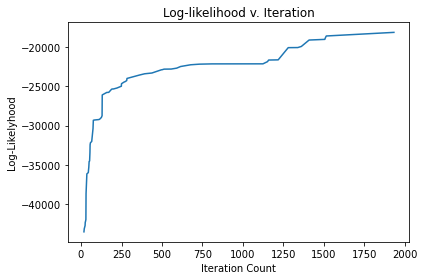

In [8]:
# Log likelihood v. iter graph
x_plot, y_plot = zip(*p_val_store)
plt.plot(x_plot, y_plot)
plt.title('Log-likelihood v. Iteration')
plt.xlabel('Iteration Count')
plt.ylabel('Log-Likelyhood')
plt.tight_layout()
plt.savefig('/Users/juanmoo/Desktop/6.437 Project/writeup_1/figures/loglikelihoodviter.png')

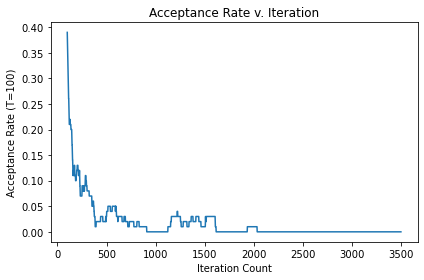

In [11]:
# Acceptance Rate v. Time
T = 100
cumm_sum = sum(accept_store[:T])
acceptance_rate = []
for j in range(T,len(accept_store)):
    acceptance_rate.append(cumm_sum/T)
    cumm_sum += accept_store[j] - accept_store[j - T]

x_plot = np.arange(T, len(accept_store))
y_plot = acceptance_rate
plt.plot(x_plot, y_plot)
plt.title('Acceptance Rate v. Iteration')
plt.xlabel('Iteration Count')
plt.ylabel(f'Acceptance Rate (T={T})')
plt.tight_layout()
plt.savefig('/Users/juanmoo/Desktop/6.437 Project/writeup_1/figures/acceptancerateviter.png')


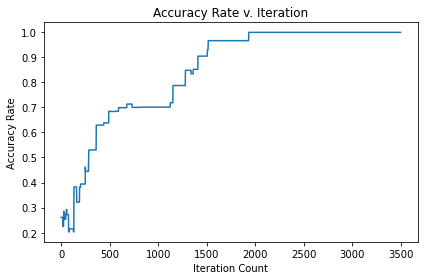

In [10]:
# Accuracy Rate v. Iteration 

x_plot, y_plot = zip(*enumerate(accuracy_store))

plt.plot(x_plot, y_plot)
plt.title('Accuracy Rate v. Iteration')
plt.xlabel('Iteration Count')
plt.ylabel(f'Accuracy Rate')
plt.tight_layout()
plt.savefig('/Users/juanmoo/Desktop/6.437 Project/writeup_1/figures/accuracyrateviter.png')


## Segmentation Experiment

In [6]:
segment_fracs = np.arange(0, 1, 0.1)
segments = [y[0:int(len(y) * (1 - f) + 0.5)] for f in segment_fracs]
# decoded_segments = []
accuracies = []
for seg in segments:
    frac = len(seg)/len(y)
    percent = int((100 * frac) + 0.5)/100
    print(f'Decoding segment percent: {percent}')
    
    num_runs = int(1/frac + 0.5)
    run_accs = []
    
    for j in range(num_runs):
        print(f'Iteration {j}')
    
        seg_decode = decode(seg, P, M, max_iter_count=3500)
    #     decoded_segments.append(seg_decode)

        acc = (seg_decode == x[:len(seg_decode)]).mean()
        run_accs.append(acc)
        
    avg_acc = sum(run_accs)/len(run_accs)
    accuracies.append(avg_acc)
    
    print(f'Accuracy: {int(100 * avg_acc + 0.5)/100}')

  0%|          | 5/3500 [00:00<01:24, 41.20it/s]

Decoding segment percent: 1.0
Iteration 0


  0%|          | 12/3500 [00:00<01:01, 57.00it/s]

Accuracy: 0.95
Decoding segment percent: 0.9
Iteration 0


  0%|          | 13/3500 [00:00<00:59, 58.65it/s]

Accuracy: 0.5
Decoding segment percent: 0.8
Iteration 0


  0%|          | 14/3500 [00:00<00:52, 66.26it/s]

Accuracy: 1.0
Decoding segment percent: 0.7
Iteration 0


  0%|          | 17/3500 [00:00<00:42, 81.49it/s]

Accuracy: 1.0
Decoding segment percent: 0.6
Iteration 0


  0%|          | 7/3500 [00:00<00:54, 64.47it/s]

Iteration 1


  1%|          | 20/3500 [00:00<00:37, 93.81it/s]

Accuracy: 1.0
Decoding segment percent: 0.5
Iteration 0


  1%|          | 18/3500 [00:00<00:40, 85.38it/s]

Iteration 1


  0%|          | 8/3500 [00:00<00:47, 74.26it/s]

Accuracy: 1.0
Decoding segment percent: 0.4
Iteration 0


  0%|          | 7/3500 [00:00<00:55, 63.18it/s]

Iteration 1


  1%|          | 27/3500 [00:00<00:26, 132.81it/s]

Accuracy: 0.55
Decoding segment percent: 0.3
Iteration 0


  2%|▏         | 79/3500 [00:00<00:13, 250.91it/s]

Iteration 1


  0%|          | 15/3500 [00:00<00:24, 144.97it/s]

Iteration 2


  1%|▏         | 47/3500 [00:00<00:15, 229.85it/s]

Accuracy: 0.99
Decoding segment percent: 0.2
Iteration 0


  1%|          | 40/3500 [00:00<00:17, 196.96it/s]

Iteration 1


  1%|          | 41/3500 [00:00<00:16, 204.60it/s]

Iteration 2


  1%|          | 40/3500 [00:00<00:16, 205.28it/s]

Iteration 3


  2%|▏         | 65/3500 [00:00<00:16, 213.35it/s]

Iteration 4


  3%|▎         | 94/3500 [00:00<00:07, 462.95it/s]

Accuracy: 0.95
Decoding segment percent: 0.1
Iteration 0


  4%|▍         | 143/3500 [00:00<00:04, 687.86it/s]

Iteration 1


  4%|▍         | 137/3500 [00:00<00:07, 452.37it/s]

Iteration 2


  3%|▎         | 119/3500 [00:00<00:06, 527.91it/s]

Iteration 3


  3%|▎         | 89/3500 [00:00<00:07, 437.88it/s]

Iteration 4


  2%|▏         | 86/3500 [00:00<00:08, 424.65it/s]

Iteration 5


  3%|▎         | 92/3500 [00:00<00:07, 451.92it/s]

Iteration 6


  2%|▏         | 86/3500 [00:00<00:08, 418.22it/s]

Iteration 7


  1%|▏         | 48/3500 [00:00<00:07, 471.44it/s]

Iteration 8


  3%|▎         | 115/3500 [00:00<00:06, 514.94it/s]

Iteration 9


100%|██████████| 3500/3500 [00:04<00:00, 730.17it/s]

Accuracy: 0.64


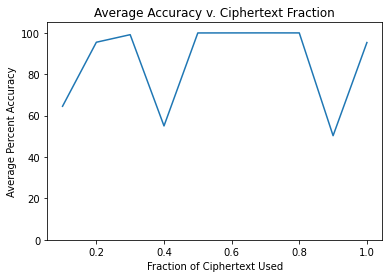

In [ ]:
x_plot = 1 - segment_fracs
y_plot = [100 * a for a in accuracies]
plt.plot(x_plot, y_plot)
plt.title('Average Accuracy v. Ciphertext Fraction')
plt.xlabel('Fraction of Ciphertext Used')
plt.ylabel('Average Percent Accuracy')
plt.ylim((0,105))
plt.savefig('../writeup_1/figures/accvfrac.png')

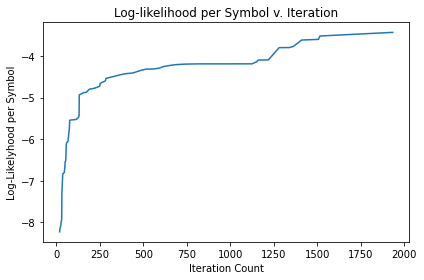

In [12]:
# Log-likelihood per Character v. Iter Count
x_plot, y_plot = zip(*p_val_store)
y_plot = [v/len(x) for v in y_plot]
plt.plot(x_plot, y_plot)
plt.title('Log-likelihood per Symbol v. Iteration')
plt.xlabel('Iteration Count')
plt.ylabel('Log-Likelyhood per Symbol')
plt.tight_layout()
plt.savefig('/Users/juanmoo/Desktop/6.437 Project/writeup_1/figures/loglikelihoodviterpersymb.png')

In [13]:
y_plot[-1]

-3.4261986654663885